In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.1 MB/s eta 0:00:00


In [ ]:
import cv2 as cv
import tensorflow as tf
import os
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np

In [ ]:
img = cv.imread('/content/drive/MyDrive/DataFace/Zaidan/Zaidan136.jpg')

In [ ]:
img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)

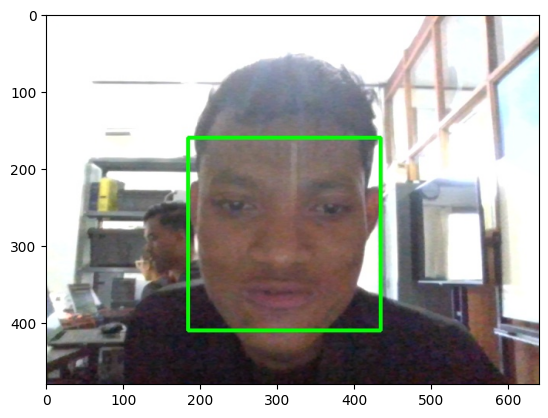

In [ ]:
plt.imshow(img2)

In [ ]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()

results = detector.detect_faces(img2)

1/1 [==============================] - 0s 264ms/step


In [ ]:
x, y, w, h = results[0]['box']

print(x)
print(y)
print(w)
print(h)

187
141
229
280


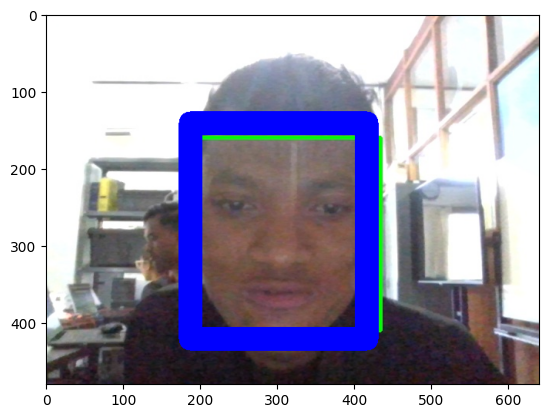

In [ ]:
img2 = cv.rectangle(img2, (x, y), (x + w, y + h), (0,0,255), 30)

plt.imshow(img2)

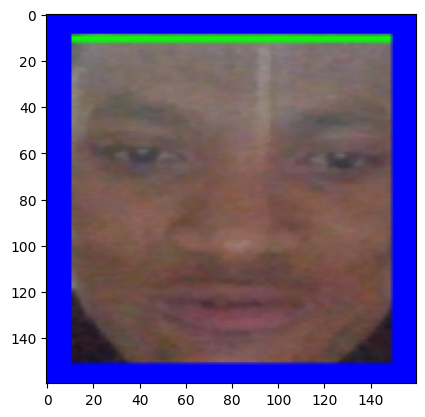

In [ ]:
wajah = img2[y : y + h, x : x + w]
wajah = cv.resize(wajah, (160, 160))
plt.imshow(wajah)

In [ ]:
class FACE_LOAD:
  def __init__(self, directory):
    self.directory = directory
    self.target_size = (160,160)
    self.X = []
    self.Y = []
    self.detector = MTCNN()

  def extract_face(self, filename):
    img = cv.imread(filename)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    results = self.detector.detect_faces(img)
    x, y, w, h = results[0]['box']
    x, y = abs(x), abs(y)
    wajah = img[y : y + h, x : x + w]
    face_arr = cv.resize(wajah, self.target_size)

    return face_arr

  def load_face(self, dir):
    MUKA = []
    for i in os.listdir(dir):
      try:
        path = dir + i
        muka = self.extract_face(path)
        MUKA.append(muka)
      except Exception as e:
        pass
    return MUKA

  def load_class(self):
    for subdir in os.listdir(self.directory):
      path = self.directory + '/' + subdir + '/'
      face_ex = self.load_face(path)
      label = [subdir for _ in range(len(face_ex))]
      print(f'Load success with: {len(label)}')
      self.X.extend(face_ex)
      self.Y.extend(label)
    return np.asarray(self.X), np.asarray(self.Y)


  def plot_image(self):
    for num,image in enumerate(self.X):
      ncols = 3
      nrows = len(self.Y)//ncols
      plt.subplot(nrows,ncols,num+1)
      plt.imshow(image)
      plt.axis('off')

In [ ]:
up_muka = FACE_LOAD('/content/drive/MyDrive/DataFace/')
X, Y = up_muka.load_class()

1/1 [==============================] - 0s 287ms/step


1/1 [==============================] - 0s 39ms/step
Load success with: 6
1/1 [==============================] - 0s 42ms/step
Load success with: 6
1/1 [==============================] - 0s 40ms/step
Load success with: 6
1/1 [==============================] - 0s 61ms/step
Load success with: 6


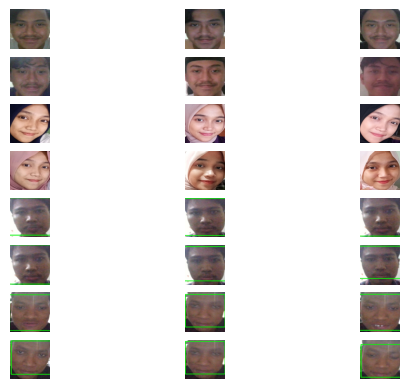

In [ ]:
up_muka.plot_image()

In [ ]:
Y

array(['Rama', 'Rama', 'Rama', 'Rama', 'Rama', 'Rama', 'Diva', 'Diva',
       'Diva', 'Diva', 'Diva', 'Diva', 'Weje', 'Weje', 'Weje', 'Weje',
       'Weje', 'Weje', 'Zaidan', 'Zaidan', 'Zaidan', 'Zaidan', 'Zaidan',
       'Zaidan'], dtype='<U6')

In [ ]:
!pip install keras-facenet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10370 sha256=4797e1152bdedb8d85bc24203f0c62d8823795a46579e2af26b0c79c67ccac26
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [ ]:
from keras_facenet import FaceNet
embedder = FaceNet()

def img_embeddings(face_img):
  face_img = face_img.astype('float32')
  face_img = np.expand_dims(face_img, axis=0)
  yhat = embedder.embeddings(face_img)
  return yhat[0]

In [ ]:
EMBEDDED_IMG = []

for img in X:
  embbed_img = img_embeddings(img)
  EMBEDDED_IMG.append(embbed_img )

1/1 [==============================] - 0s 355ms/step


In [ ]:
EMBEDDED_IMG = np.asarray(EMBEDDED_IMG)

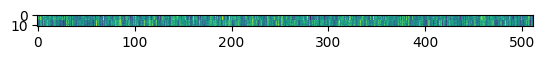

In [ ]:
plt.imshow(EMBEDDED_IMG)

In [ ]:
np.savez_compressed('2_classes_done_tambah_1.npz', EMBEDDED_IMG, Y)

SVM

In [ ]:
Y

array(['Rama', 'Rama', 'Rama', 'Rama', 'Rama', 'Rama', 'Diva', 'Diva',
       'Diva', 'Diva', 'Diva', 'Diva', 'Weje', 'Weje', 'Weje', 'Weje',
       'Weje', 'Weje', 'Zaidan', 'Zaidan', 'Zaidan', 'Zaidan', 'Zaidan',
       'Zaidan'], dtype='<U6')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [ ]:
encoder.inverse_transform(Y)

array(['Rama', 'Rama', 'Rama', 'Rama', 'Rama', 'Rama', 'Diva', 'Diva',
       'Diva', 'Diva', 'Diva', 'Diva', 'Weje', 'Weje', 'Weje', 'Weje',
       'Weje', 'Weje', 'Zaidan', 'Zaidan', 'Zaidan', 'Zaidan', 'Zaidan',
       'Zaidan'], dtype='<U6')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_IMG, Y, shuffle = True, random_state = 10)

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear', probability = True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [ ]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, Y_train_pred)

1.0

In [ ]:
accuracy_score(Y_test, Y_test_pred)

1.0

In [ ]:
t_im = cv.imread('/content/drive/MyDrive/DataML/pakde.jpeg')

t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)

x, y, w, h = detector.detect_faces(t_im)[0]['box']

t_im = t_im[y : y + h, x : x + w]
t_im = cv.resize(t_im, (160, 160))

test_im = img_embeddings(t_im)
test_im = [test_im]

1/1 [==============================] - 0s 96ms/step


In [ ]:
y_preds_2 = model.predict(test_im)

In [ ]:
y_preds_2

array([1])

In [ ]:
encoder.inverse_transform(y_preds_2)

array(['Weje'], dtype='<U4')

In [ ]:
distances = model.decision_function(test_im)
min_distance = np.min(distances)

print(distances)
print(min_distance)

[[-0.18150477  0.91931784  2.20078473]]
-0.18150476770720209


In [ ]:
unknown_threshold = -0.16

In [ ]:
min_distance > unknown_threshold

False

In [ ]:
import pickle

pickle.dump(model, open('model_face3.pkl', 'wb'))